In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
ds=pd.read_csv('/content/drive/MyDrive/spt/GSE33000_final.csv')


In [ ]:
features_name=ds.columns
features_name = features_name[6:]
print(features_name.shape)

(16376,)


In [ ]:
from sklearn.impute import SimpleImputer
X=ds[features_name].to_numpy()
y=ds['Disease Status'].to_numpy()
for i in range(0,624):
  if y[i]==2:
    y[i]=0
print(X)
ImputedModule = SimpleImputer(missing_values = np.nan, strategy ='mean')
ImputedX = ImputedModule.fit(X)
X = ImputedX.transform(X)


[[0.385   0.284   0.598   ... 0.425   0.0997  0.022  ]
 [0.306   0.293   0.392   ... 0.329   0.184   0.0174 ]
 [0.247   0.284   0.35    ... 0.185   0.154   0.0088 ]
 ...
 [0.52    0.364   0.703   ... 0.967   0.132   0.00907]
 [0.576   0.25    0.36    ... 0.466   0.197   0.00866]
 [0.625   0.417   0.287   ... 0.315   0.277   0.0292 ]]


In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

K=40
score_chi2=[]
ID_chi=[]

ch2 = SelectKBest(chi2, k=K)
X1= ch2.fit_transform(X, y)

nn1= ch2.get_support()
F1_len=len(nn1)

for i in range ( F1_len):
        if nn1[i]==True:
            
            print( features_name[i],":",ch2.scores_[i])
            
            score_chi2.append(ch2.scores_[i])
            #ID_chi.append(features_Id[i])
    # # print( ch2.get_params())
    # ##--------------------------------------------
ID_chi=[int(i) for i in ID_chi] # to convert list from float to int 
m_ID_chi2 = []
for j in range(len(ID_chi)):
    m_ID_chi2.append([ID_chi[j], score_chi2[j]])
m_ID_chi2.sort(key=lambda x: x[1], reverse=True)

PTGDS,PDS,PGD2,PGDS,PGDS2 : 2015.4976710292735
GFAP,FLJ45472 : 3484.967166497837
VIM,FLJ36605 : 1513.4895126834654
LMO4 : 488.9869006046214
TXNIP,THIF,VDUP1,HHCPA78,EST01027 : 458.24007817316306
IFITM2,1-8D : 939.0151204788858
CHN1,CHN,ARHGAP2,RHOGAP2 : 478.0676253876254
UCHL1,PARK5,PGP9.5.1 : 1063.3194211957127
BEX1,BEX2,HBEX2,HGR74-h : 665.6485730869312
B2M : 900.5559365408544
PFN2,PFL,D3S1319E : 536.0846522883076
CHGB,SCG1 : 496.05304514149805
SYN2,SYNII,SYNIIa,SYNIIb : 523.0981993258067
CCK : 783.7637428699318
YWHAH,YWHA1 : 492.8569004352768
OLFM1,AMY,NOE1,OlfA,NOELIN,NOELIN1,NOELIN1_V1,NOELIN1_V2,NOELIN1_V4 : 1237.1059528585192
STXBP1,UNC18,hUNC18,rbSec1,MUNC18-1 : 490.9850612245614
RTN1,NSP : 732.0327493018885
K-ALPHA-1 : 523.5854634679304
GNG3 : 490.61439965629074
TU3A,DRR1 : 774.6730397556744
SLC1A3,EAAT1,GLAST,GLAST1 : 457.8913191684198
BASP1,CAP23,NAP22,CAP-23,NAP-22,MGC8555 : 839.7107803295997
CLU,CLI,APOJ,SGP2,SGP-2,SP-40,TRPM2,TRPM-2,MGC24903 : 943.6168357928311
GJA1,ODD,C

In [ ]:
from sklearn.feature_selection import f_classif


K=20
score_anova=[]
ID_anova=[]
Anova_fs = SelectKBest(f_classif, k=K)
X2= Anova_fs.fit_transform(X, y)
nn2= Anova_fs.get_support()
F2_len=len(nn2)

for i in range ( F2_len):
        if nn2[i]==True:
            
            print( features_name[i],":",ch2.scores_[i])
            # names_anova.append(features_name[i])
            #score_anova.append(Anova_fs.scores_[i])
            #ID_anova.append(features_Id[i])
  
ID_anova=[int(i) for i in ID_anova] # to convert list from float to int 
m_ID_anova = []
for j in range(len(ID_anova)):
    m_ID_anova.append([ID_anova[j], score_anova[j]])
m_ID_anova.sort(key=lambda x: x[1], reverse=True)

MARCH4,RNF174,MARCH-IV,MGC104908 : 36.701566763192766
CBLN4,CBLNL1 : 67.61069894015901
FLJ37034 : 9.816332216749146
PCDH8,PAPC,ARCADLIN : 257.010248287303
HSPB3,HSPL27 : 23.72297037266371
RBP4 : 150.57411230602375
HRAS,HRAS1,K-ras,N-ras,RASH1,c-bas/has : 14.044425540538713
C1orf95,RP11-9C4.1,DKFZp761P211.1 : 14.491393959866926
EMID2,EMI6,EMU2,hEmu2,COL26A1,MGC129848 : 31.93781349119501
TAC3,NKB,NKNB,PRO1155,ZNEUROK1 : 56.13259207429361
HAS1,HAS : 11.832252807918664
OLFM1,AMY,NOE1,OlfA,NOELIN,NOELIN1,NOELIN1_V1,NOELIN1_V2,NOELIN1_V4 : 1237.1059528585192
GNG3 : 490.61439965629074
HOP,OB1,LAGY,Toto,Cameo,NECC1,SMAP31,MGC20820 : 334.8508100463466
VMP,p24 : 124.65941240006663
LOC387856 : 66.90894101823834
MGC10911 : 6.070524429301683
PIN1L,PIN1 peptidyl-prolyl cis/trans isomerase-like,peptidyl-prolyl cis/trans isomerase, NIMA-interacting-like : 102.32385339955864
SVOP,DKFZp761H039 : 123.39556270891948
ATP2A2,DD,DAR,ATP2B,SERCA2,MGC45367.1 : 75.85075688677358


In [ ]:
from sklearn.feature_selection import mutual_info_classif

K=20
score_MI=[]
ID_MI=[]
MI_fs = SelectKBest(mutual_info_classif, k=10)
X3= MI_fs.fit_transform(X, y)
nn3= MI_fs.get_support()
F3_len=len(nn3)

for i in range ( F3_len):
        if nn3[i]==True:
            
            print( features_name[i],":",ch2.scores_[i])
            # names_MI.append(features_name[i])
            #ID_MI.append(features_Id[i])
            #score_MI.append(MI_fs.scores_[i])
  
    # ##--------------------------------------------
ID_MI=[int(i) for i in ID_MI] # to convert list from float to int 
m_ID_MI = []
for j in range(len(ID_MI)):
    m_ID_MI.append([ID_MI[j], score_MI[j]])
m_ID_MI.sort(key=lambda x: x[1], reverse=True)


MARCH4,RNF174,MARCH-IV,MGC104908 : 36.701566763192766
FREM3 : 23.64327647663013
CBLN4,CBLNL1 : 67.61069894015901
FLJ37034 : 9.816332216749146
PCDH8,PAPC,ARCADLIN : 257.010248287303
CAP2 : 118.34059360828803
RBP4 : 150.57411230602375
CRH,CRF : 68.1336543161909
OLFM1,AMY,NOE1,OlfA,NOELIN,NOELIN1,NOELIN1_V1,NOELIN1_V2,NOELIN1_V4 : 1237.1059528585192
PIN1L,PIN1 peptidyl-prolyl cis/trans isomerase-like,peptidyl-prolyl cis/trans isomerase, NIMA-interacting-like : 102.32385339955864


In [ ]:
X=ds[['OLFM1,AMY,NOE1,OlfA,NOELIN,NOELIN1,NOELIN1_V1,NOELIN1_V2,NOELIN1_V4','CRH,CRF']].to_numpy()

In [ ]:
ImputedModule = SimpleImputer(missing_values = np.nan, strategy ='mean')
ImputedX = ImputedModule.fit(X)
X = ImputedX.transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_tr, X_ts, y_tr, y_ts= train_test_split(X, y, test_size=125, random_state=44, shuffle =True)

print('X_train shape is ' , X_tr.shape)
print('X_test shape is ' , X_ts.shape)
print('y_train shape is ' , y_tr.shape)
print('y_test shape is ' , y_ts.shape)

X_train shape is  (499, 2)
X_test shape is  (125, 2)
y_train shape is  (499,)
y_test shape is  (125,)


In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
k=10
n=30
Id_case=[]

# acc_arr_A8=[]
# acc_arr_S8=[]
# acc_arr_R8=[]
# acc_arr_L8=[]
rskf = RepeatedStratifiedKFold(n_splits=k,n_repeats=n,random_state=44)
rskf.get_n_splits(X_tr, y_tr)

precision_av=0
Recall_av=0
specificity_av=0
acc_av=0
f1_av=0
roc_auc_av=0
cm_av=0
kappa_av=0

    
for train_index1, test_index1 in rskf.split(X_tr, y_tr):
        X_train1, X_test1 =X_tr[[train_index1]],X_tr[[test_index1]]
        y_train1, y_test1 = y_tr[train_index1],y_tr[test_index1]
  
#print('X_train1' , X_train1.shape)
print(X_train1[0])
case=X_train1[0]
Id_case.append(case)


[57.2    0.988]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a differe

In [ ]:
print(X_train1.shape)

(450, 2)


In [ ]:

from sklearn.svm import SVC
SVM = SVC(kernel="linear")

SVM.fit(X_train1, y_train1)
fit_time = time.time()- t0
        % fit_time)
        
train_score= SVM.score(X_train1, y_train1)
#        print('SVM Train Score is : ' ,train_score )
        
test_score= SVM.score(X_test1, y_test1)
#        print('SVM Test Score is : ' , test_score )
        
y_pred = SVM.predict(X_test1)

In [ ]:
from sklearn import metrics
from sklearn.metrics import *

cm = confusion_matrix(y_test1, y_pred) 
print('Confusion Matrix : \n', cm)
cm_av+=cm
acc_arr_S8=[]        
      
accuracy_score=metrics.accuracy_score(y_test1, y_pred)
acc_arr_S8.append(accuracy_score)
print("accuracy_score=",accuracy_score)
acc_av+=accuracy_score
        
################################# f1_score
from sklearn.metrics import f1_score
f1_sco=f1_score(y_test1, y_pred)
print('f1_score=',f1_sco)        
f1_av+=f1_sco
        
########################### roc_auc_score  
roc_auc = metrics.roc_auc_score(y_test1,y_pred)
print("roc_auc=",roc_auc)
roc_auc_av+=roc_auc

            
################ precision
PrecisionScore = precision_score(y_test1, y_pred)
print("Precision:",PrecisionScore)
precision_av+=PrecisionScore
        
################Recall       
Rec=recall_score(y_test1, y_pred)
print("recall:", Rec)
Recall_av+=Rec
        
###################specificity
spec = cm[1,1]/(cm[1,1]+cm[1,0])
print('Specificity : ', spec)
specificity_av+=spec
        
############# kappa
kappa=cohen_kappa_score(y_test1, y_pred)
print('kappa:', kappa)
kappa_av+=kappa
         
######### get the average of the evaluation metrics            

precision_average=(precision_av/n)/k
Recall_average=(Recall_av/n)/k
spec_average=(specificity_av/n)/k
kappa_average=(kappa_av/n)/k
acc_average= (acc_av/n)/k
f1_average=(f1_av/n)/k
roc_auc_average=(roc_auc_av/n)/k
cm_average=(cm_av/n)



#print("acc_average=",acc_average)
#print("f1_average=",f1_average)
#print("roc_auc_av=",roc_auc_average)
#print("time_average=",time_average)
#print("train_score_av=",train_score_av)
#print("test_score_av=",test_score_av)

Confusion Matrix : 
 [[21  5]
 [ 1 22]]
accuracy_score= 0.8775510204081632
f1_score= 0.8800000000000001
roc_auc= 0.8821070234113713
Precision: 0.8148148148148148
recall: 0.9565217391304348
Specificity :  0.9565217391304348
kappa: 0.7566225165562914


In [ ]:
test_score= SVM.score(X_ts, y_ts)
print('SVM Test Score is : ' , test_score )
y_pred2 = SVM.predict(X_ts)

###### metrics to evaluate test set 
accuracy_test=metrics.accuracy_score(y_ts, y_pred2)
f1_sco_test=f1_score(y_ts, y_pred2)
roc_auc_test = metrics.roc_auc_score(y_ts, y_pred2)
cm_test = confusion_matrix(y_ts, y_pred2) 
Precision_test = precision_score(y_ts, y_pred2)       
Recall_test=recall_score(y_ts, y_pred2)
spec_test = cm_test[1,1]/(cm_test[1,0]+cm_test[1,1])    
kappa_test=cohen_kappa_score(y_ts, y_pred2)
 
print("precision:",Precision_test)        
print("recall:",Recall_test) 
print("spec:",spec_test)                          
print("accuracy:",accuracy_test)
print("f1 score:",f1_sco_test)
print("auc:",roc_auc_test)
print( cm_test)


SVM Test Score is :  0.784
precision: 0.7922077922077922
recall: 0.8472222222222222
spec: 0.8472222222222222
accuracy: 0.784
f1 score: 0.8187919463087249
auc: 0.7726677148846961
[[37 16]
 [11 61]]


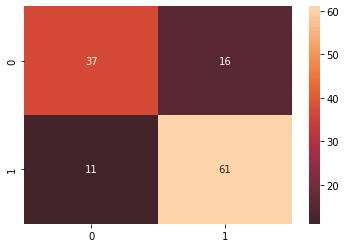

In [ ]:
import seaborn as sns
sns.heatmap(cm_test,center=True, annot=True)

In [ ]:
import time
from sklearn import metrics
from sklearn.metrics import *
from sklearn.linear_model import LogisticRegression
LR= LogisticRegression()
t0 = time.time()
LR.fit(X_train1, y_train1)
fit_time = time.time() - t0
train_score= LR.score(X_train1, y_train1)
test_score=LR.score(X_test1, y_test1)
y_pred = LR.predict(X_test1)
cm1 = confusion_matrix(y_test1, y_pred) 
print('Confusion Matrix : \n', cm1)
cm_av+=cm1
acc_arr_S8=[]        
accuracy_score=metrics.accuracy_score(y_test1, y_pred)
acc_arr_S8.append(accuracy_score)
print("accuracy_score=",accuracy_score)
acc_av+=accuracy_score
from sklearn.metrics import f1_score
f1_sco=f1_score(y_test1, y_pred)
print('f1_score=',f1_sco)        
f1_av+=f1_sco
roc_auc = metrics.roc_auc_score(y_test1,y_pred)
print("roc_auc=",roc_auc)
roc_auc_av+=roc_auc
PrecisionScore = precision_score(y_test1, y_pred)
print("Precision:",PrecisionScore)
precision_av+=PrecisionScore
Rec=recall_score(y_test1, y_pred)
print("recall:", Rec)
Recall_av+=Rec


Confusion Matrix : 
 [[21  5]
 [ 1 22]]
accuracy_score= 0.8775510204081632
f1_score= 0.8800000000000001
roc_auc= 0.8821070234113713
Precision: 0.8148148148148148
recall: 0.9565217391304348


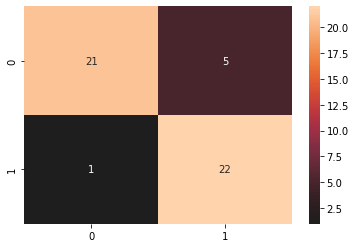

In [ ]:
import seaborn as sns
sns.heatmap(cm1,center=True, annot=True)

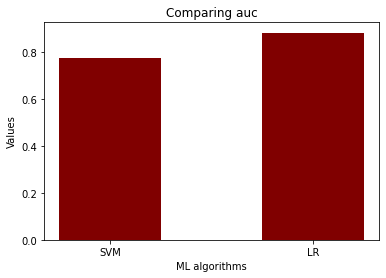

In [ ]:
import matplotlib.pyplot as plt
Y = [0.7726677148846961,0.8821070234113713]
x= ['SVM','LR']
plt.bar(x,Y,color="maroon",width=0.5)
plt.xlabel('ML algorithms')
plt.ylabel("Values")
plt.title('Comparing auc')
plt.show()


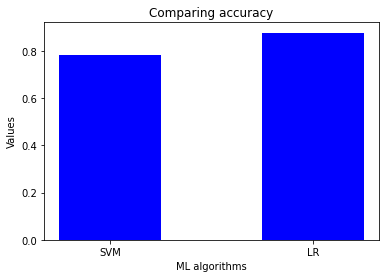

In [ ]:
import matplotlib.pyplot as plt
Y = [0.784,0.8775510204081632]
x= ['SVM','LR']
plt.bar(x,Y,color="blue",width=0.5)
plt.xlabel('ML algorithms')
plt.ylabel("Values")
plt.title('Comparing accuracy')
plt.show()


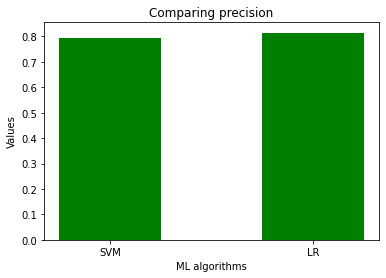

In [ ]:
import matplotlib.pyplot as plt
Y = [0.7922077922077922,0.8148148148148148]
x= ['SVM','LR']
plt.bar(x,Y,color="green",width=0.5)
plt.xlabel('ML algorithms')
plt.ylabel("Values")
plt.title('Comparing precision')
plt.show()
